<h1> Modelo Preditivo para Doenças Cardiovasculares </h1>

<h1><hr></h1>

<h2> Uma breve contextualização </h2>

*Texto da introdução*

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

- `idade`: idade do paciente (em dias)
- `altura`: altura do paciente (em centímetros)
- `peso`: peso ou massa corporal do paciente(em kg)
- `genero`: gênero, em que
    - 1: masculino
    - 2: feminino
- `pa_sist`: Pressão arterial sistólica - recurso de exame
- `pa_diast`: Pressão arterial diastólica - recurso de exame
- `colesterol`: nível de colesterol, em que:
    - 1: normal 
    - 2: acima do normal 
    - 3: muito acima normal
- `glicose`: Glicose - recurso de exame, em que
    - 1: normal
    - 2: acima do normal
    - 3: muito acima do normal
- `fumante`: fumante
    - 0: não fumante
    - 1: fumante
- `alcool`: Ingestão de álcool
    - 0: não bebe
    - 1: bebe
- `a_fisica`: Atividade física
    - 0: não praticante
    - 1: praticante
- `cardio`: Presença ou ausência de doença cardiovascular
    - 0: ausente
    - 1: presente

<h2> Preparando a base de dados </h2>

*Textinho explicando toda a manipulação necessária no banco de dados*

In [2]:
# Leitura da base de dados:
dados = pd.read_csv('./data/cardio_data.csv', delimiter=';')

# Tradução dos labels para Português:
dados.columns = ['id', 'idade', 'genero', 'altura', 'peso', 'pa_sist', 'pa_diast',
                 'colesterol', 'glicose', 'fumante', 'alcool', 'a_fisica', 'cardio']

In [3]:
dados.head()

,id,idade,genero,altura,peso,pa_sist,pa_diast,colesterol,glicose,fumante,alcool,a_fisica,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Contando elementos vazios em cada coluna do dataframe
dados.isnull().sum()

id            0
idade         0
genero        0
altura        0
peso          0
pa_sist       0
pa_diast      0
colesterol    0
glicose       0
fumante       0
alcool        0
a_fisica      0
cardio        0
dtype: int64

In [5]:
# Converte idade de dias para anos, arredondado para o inteiro inferior
dados['idade'] = dados['idade']//365

# Converte altura de centímetros para metros
dados['altura'] = dados['altura']/100

In [6]:
# mostra o tipo de cada variável (coluna) do dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          70000 non-null  int64  
 1   idade       70000 non-null  int64  
 2   genero      70000 non-null  int64  
 3   altura      70000 non-null  float64
 4   peso        70000 non-null  float64
 5   pa_sist     70000 non-null  int64  
 6   pa_diast    70000 non-null  int64  
 7   colesterol  70000 non-null  int64  
 8   glicose     70000 non-null  int64  
 9   fumante     70000 non-null  int64  
 10  alcool      70000 non-null  int64  
 11  a_fisica    70000 non-null  int64  
 12  cardio      70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.9 MB


In [7]:
# Cria cópia do dataframe. Esta cópia será mantida para conservar os valores numéricos
# que categorizam as variáveis categóricas
dados_num = dados.copy()

In [8]:
# Converte colunas necessárias para categóricas
dados['genero'] = dados['genero'].astype('category')
dados['colesterol'] = dados['colesterol'].astype('category')
dados['glicose'] = dados['glicose'].astype('category')
dados['fumante'] = dados['fumante'].astype('category')
dados['alcool'] = dados['alcool'].astype('category')
dados['a_fisica'] = dados['a_fisica'].astype('category')
dados['cardio'] = dados['cardio'].astype('category')

In [9]:
# Atribuindo as categorias para cada variável categórica
dados['colesterol'].cat.categories = ['normal', 'acima do normal', 'muito acima do normal']
dados['glicose'].cat.categories = ['normal', 'acima do normal', 'muito acima do normal']
dados['fumante'].cat.categories = ['não fumante', 'fumante']
dados['alcool'].cat.categories = ['não bebe', 'bebe']
dados['a_fisica'].cat.categories = ['não praticante', 'praticante']
dados['genero'].cat.categories = ['masculino', 'feminino']
dados['cardio'].cat.categories = ['ausente', 'presente'] # variável target

In [10]:
# Atribuindo ordenação às variáveis categóricas ordinais
dados['colesterol'] = dados['colesterol'].cat.as_ordered()
dados['glicose'] = dados['glicose'].cat.as_ordered()

In [11]:
dados.head()

,id,idade,genero,altura,peso,pa_sist,pa_diast,colesterol,glicose,fumante,alcool,a_fisica,cardio
0,0,50,feminino,1.68,62.0,110,80,normal,normal,não fumante,não bebe,praticante,ausente
1,1,55,masculino,1.56,85.0,140,90,muito acima do normal,normal,não fumante,não bebe,praticante,presente
2,2,51,masculino,1.65,64.0,130,70,muito acima do normal,normal,não fumante,não bebe,não praticante,presente
3,3,48,feminino,1.69,82.0,150,100,normal,normal,não fumante,não bebe,praticante,presente
4,4,47,masculino,1.56,56.0,100,60,normal,normal,não fumante,não bebe,não praticante,ausente


Uma última etapa a ser feita na limpeza do dataset corresponde à remoção de alguns outliers. Por exemplo, ao fazer uma análise descritiva rápida das variáveis numéricas, pode-se notar alguns dados que são inconsistentes com a realidade ou fogem totalmente do padrão observado na massa de dados. Veja um exemplo:

In [12]:
# Média, valor mínimo e máximo de Pressão Sistólica
media_p_sist = dados['pa_sist'].mean()
minimo_p_sist = min(dados['pa_sist'])
maximo_p_sist = max(dados['pa_sist'])

# Exibe resultados
print('PRESSÃO SISTÓLICA')
print('-----------------')
print(f'Média: {media_p_sist} \nMínimo (em mmHg): {minimo_p_sist} \nMáximo (em mmHg): {maximo_p_sist}')

PRESSÃO SISTÓLICA
-----------------
Média: 128.8172857142857 
Mínimo (em mmHg): -150 
Máximo (em mmHg): 16020


Observando acima, há registro de pressão negativa, ao mesmo tempo em que há valores de pressão totalmente fora da realidade, se tratando de pressão cardíaca (para se ter uma ideia, 16000 mmHg corresponde a *21 atmosferas de pressão!!*). O mesmo acontece com dados referentes à pressão diastólica:

In [13]:
# Média, valor mínimo e máximo de Pressão Sistólica
media_p_diast = dados['pa_diast'].mean()
minimo_p_diast = min(dados['pa_diast'])
maximo_p_diast = max(dados['pa_diast'])

# Exibe resultados
print('PRESSÃO SISTÓLICA')
print('-----------------')
print(f'Média: {media_p_diast} \nMínimo (em mmHg): {minimo_p_diast} \nMáximo (em mmHg): {maximo_p_diast}')

PRESSÃO SISTÓLICA
-----------------
Média: 96.63041428571428 
Mínimo (em mmHg): -70 
Máximo (em mmHg): 11000


Com os dados referentes à massa corporal (peso) e à altura, há alguns valores que fogem do padrão observado. Por exemplo, há registro de adultos com massa corporal de 10kg, 20kg, bem como de adultos com 55cm de altura. Para se ter um efeito de comparação desses valores, [o menor adulto humano do mundo](http://revistagalileu.globo.com/Revista/Common/0,,EMI296481-17770,00-CONHECA+O+MENOR+HOMEM+DO+MUNDO.html) já registrado tinha 54,6 cm e 17 kg, o que são casos raríssimos no planeta e, portanto, serão tratados como outliers e removidos do dataset, pois destoam completamente da base de dados.

Assim, aplicando uma remoção de todos esses outliers:

In [14]:
# Filtros do dataset
def filtra_dataset(df):
    cond_1 = (df['pa_sist'] > 24)
    cond_2 = (df['pa_sist'] < 240)

    cond_3 = (df['pa_diast'] > 30)
    cond_4 = (df['pa_diast'] < 250)

    cond_5 = (df['altura'] > 0.7)
    cond_6 = (df['peso'] > 30)

    # Unindo em um único filtro
    condicoes = cond_1 & cond_2 & cond_3 & cond_4 & cond_5 & cond_6 

    # Atualiza dataset
    df = df.loc[condicoes]
    return df

# Atualizando
dados = filtra_dataset(dados)
dados_num = filtra_dataset(dados_num)

In [15]:
# Tamanho atualizado do dataset
dados.shape

(68745, 13)

___
<h2 class="analise_exploratoria"> Análise Exploratória dos dados </h2>

<h3>Análise descritiva das variáveis numéricas </h3>

In [16]:
# Função que recebe uma lista de colunas e o dataframe corresponde e devolve
# um novo dataframe com uma descrição estatística correspondente a cada coluna
def descreve_variavel(df, lista_colunas):
    df_descrito = pd.DataFrame(df[lista_colunas]).describe()
    df_descrito.index = ['Quantidade total', 
                         'Média', 
                         'Desvio Padrão', 
                         'Valor mínimo', 
                         'Quartil (25%)', 
                         'Quartil (50%)', 
                         'Quartil (75%)', 
                         'Valor máximo']
    return df_descrito

In [17]:
# Descrição estatística das variáveis numéricas
descreve_variavel(dados, ['idade', 'peso', 'altura', 'pa_sist', 'pa_diast'])

,idade,peso,altura,pa_sist,pa_diast
Quantidade total,68745.000000,68745.000000,68745.000000,68745.000000,68745.000000
Média,52.828569,74.128982,1.643827,126.605979,81.379329
Desvio Padrão,6.769052,14.320756,0.080570,16.726679,9.668807
Valor mínimo,29.000000,31.000000,0.710000,60.000000,40.000000
Quartil (25%),48.000000,65.000000,1.590000,120.000000,80.000000
Quartil (50%),53.000000,72.000000,1.650000,120.000000,80.000000
Quartil (75%),58.000000,82.000000,1.700000,140.000000,90.000000
Valor máximo,64.000000,200.000000,2.500000,230.000000,190.000000


A tabela acima fornece os principais valores descritivos estatísticos (média, desvio padrão, quartis, valores máximo e mínimo) referente a cada uma das variáveis numéricas. Veja, logo abaixo, como se dá a distribuição de cada uma dessas variáveis.

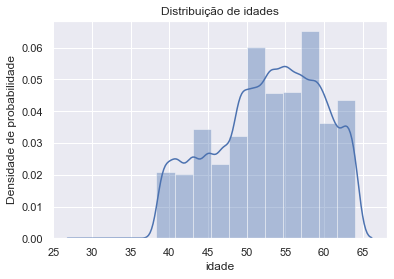

In [18]:
# Densidade de distribuição das idades

sns.distplot(dados['idade'], bins=15)
plt.ylabel('Densidade de probabilidade')
plt.title('Distribuição de idades');

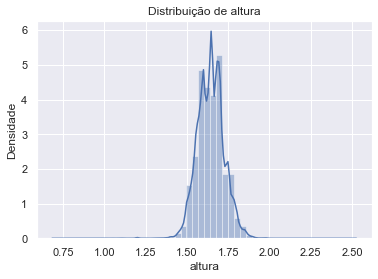

In [19]:
# Densidade de distribuição da altura

sns.distplot(dados['altura'], bins=50)
plt.ylabel('Densidade')
plt.title('Distribuição de altura');

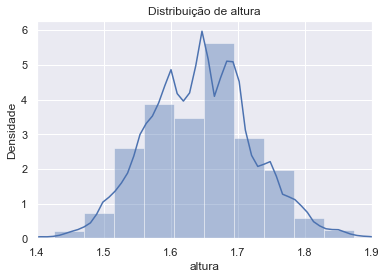

In [20]:
# Observando a distribuição anterior na região de maior densidade

sns.distplot(dados['altura'], bins=40) # dessa vez com 40 faixas
plt.xlim((1.4, 1.9))
plt.ylabel('Densidade')
plt.title('Distribuição de altura');

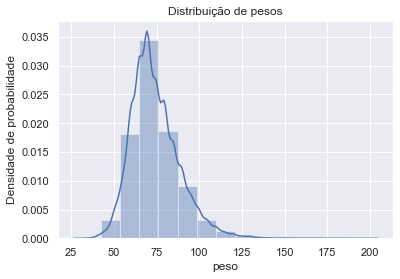

In [21]:
# peso
sns.distplot(dados['peso'], bins=15)
plt.ylabel('Densidade de probabilidade')
plt.title('Distribuição de pesos');

<h3>Análise das variáveis categóricas</h3>

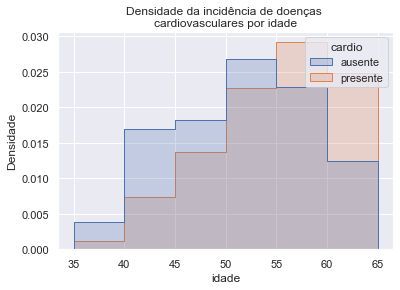

In [22]:
faixa_idade = np.arange(35, 70, 5)
# Plota hitograma de idade em função da categoria cardio
sns.histplot(dados, x='idade', hue='cardio', stat='density', bins=faixa_idade, element='step')
plt.ylabel('Densidade')
plt.title('Densidade da incidência de doenças \ncardiovasculares por idade');


# mudar a legenda para a direita

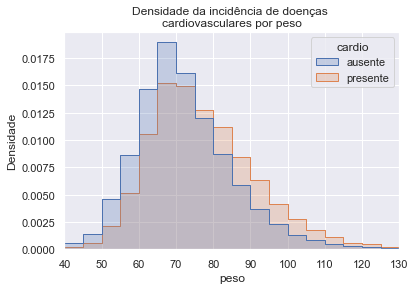

In [23]:
faixa_peso = np.arange(30, 150, 5)

# Plota histograma de peso em função da categoria cardio
sns.histplot(dados, x='peso', hue='cardio', bins=faixa_peso, stat='density', element='step') #multiple='dodge'
plt.ylabel('Densidade')
plt.xlim((40, 130))
plt.title('Densidade da incidência de doenças \ncardiovasculares por peso');

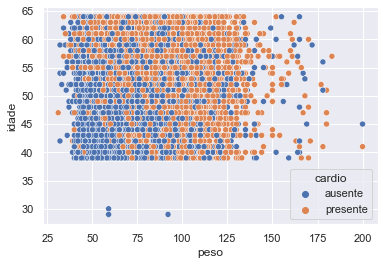

In [24]:
sns.scatterplot(x='peso', y='idade', hue='cardio', data=dados);


# Tem gente bem magrinha aí

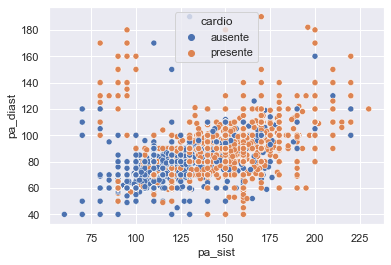

In [25]:
sns.scatterplot(x='pa_sist', y='pa_diast', hue='cardio', data=dados);


# Corrigir unidades de alguns valores de pressão

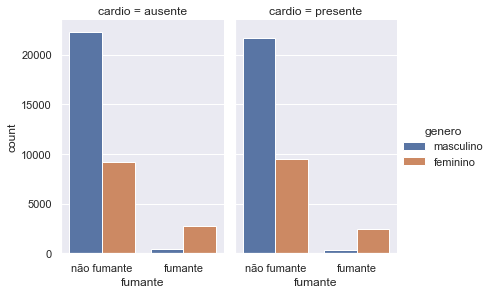

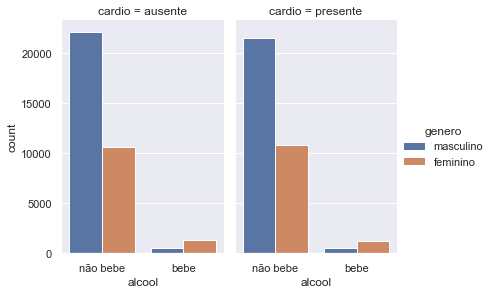

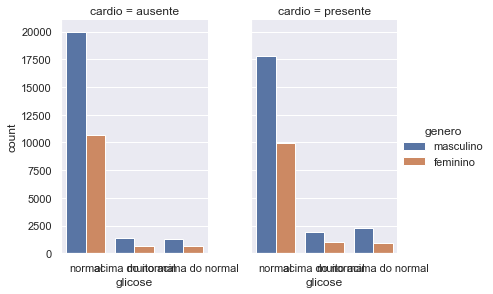

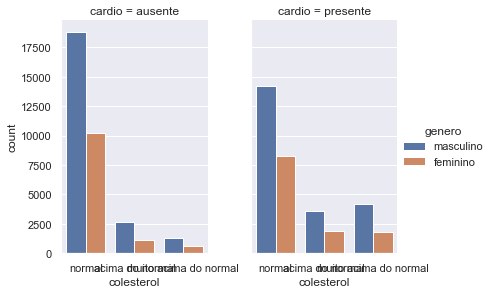

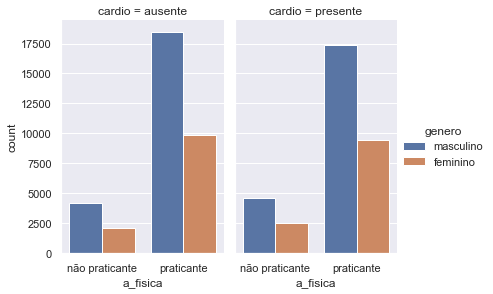

In [26]:
features = ['fumante', 'alcool', 'glicose', 'colesterol', 'a_fisica']

for feature in features:
    sns.catplot(x=feature ,hue='genero', col='cardio', data=dados, kind='count', height=4, aspect=.7)
    

# colocar inclinação no xlabel

In [27]:
lista = sorted(list(dados['pa_sist']))
print(lista)

[60, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90,

In [28]:
lista1 = sorted(list(dados['pa_diast']))
print(lista1)

[40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 45, 45, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 52, 52, 53, 53, 53, 54, 55, 55, 55, 55, 56, 57, 57, 57, 57, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60,

In [29]:
lista2 = sorted(list(dados['peso']))
print(lista2)

[31.0, 32.0, 32.0, 32.0, 33.0, 34.0, 34.0, 34.0, 34.0, 35.0, 35.0, 35.45, 36.0, 36.0, 36.0, 36.0, 36.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42

In [30]:
lista3 = sorted(list(dados['altura']))
print(lista3)

[0.71, 0.72, 0.74, 0.75, 0.75, 0.76, 0.8, 0.81, 0.91, 0.96, 0.97, 0.99, 1.0, 1.0, 1.0, 1.04, 1.04, 1.05, 1.05, 1.08, 1.09, 1.09, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.11, 1.12, 1.13, 1.17, 1.17, 1.19, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.22, 1.25, 1.25, 1.25, 1.25, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.31, 1.32, 1.32, 1.32, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.34, 1.34, 1.35, 1.35, 1.35, 1.35, 1.35, 1.36, 1.36, 1.36, 1.36, 1.36, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.38, 1.39, 1.39, 1.39, 1.39, 1.39, 1.39, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.41, 1.41, 1.41, 1.41

<h2> Referências </h2>

https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

[Paradinha das pressões](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)